In [1]:
import sys
sys.path.append("..")  # to make utils importable

In [2]:
import utils.consts
import utils.data_worker

import pandas as pd

from text_metrics import words_count, tech_words_count, negative_answers_count

Описание полей: <br>
OwnerUserId поста это Id юзера <br>
PostTypeId 1 или 2 - 1 это вопрос, 2 это ответ <br>
ParentId ответа это Id вопроса


In [3]:
posts = utils.data_worker.load_dataset(utils.consts.POSTS_DATA_PATH, debug_slice=False)
users = utils.data_worker.load_dataset(utils.consts.USERS_DATA_PATH, debug_slice=False)

INFO: Loading dataset ../data/Posts.xml...
INFO: Loading dataset ../data/Users.xml...


In [4]:
questions, answers = utils.data_worker.question_answer_split(posts)

answers.Tags.isna().sum(), answers.shape[0]

(178628, 178628)

In [5]:
posts.sample(5)

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,...,Tags,AnswerCount,CommentCount,ClosedDate,CommunityOwnedDate,ContentLicense,ParentId,OwnerDisplayName,LastEditorDisplayName,FavoriteCount
225776,419666,2,NaN,2020-12-04T20:40:51.583,5,NaN,<p>It's still trivial. Everywhere you have <co...,115557.0,NaN,None,...,None,NaN,4,None,None,CC BY-SA 4.0,419663.0,None,None,NaN
50807,109999,2,NaN,2011-09-22T07:57:55.223,0,NaN,<p><strong>AMQP</strong></p>\n\n<p>Use an <a h...,7575.0,31260.0,2011-09-22T10:14:06.527,...,None,NaN,2,None,None,CC BY-SA 3.0,109985.0,None,None,NaN
19641,46604,2,NaN,2011-02-11T08:27:01.377,1,NaN,<p>Introducing tdd against the will of develop...,9007.0,9007.0,2011-02-11T08:32:51.267,...,None,NaN,0,None,None,CC BY-SA 2.5,46583.0,None,None,NaN
1988,6005,1,NaN,2010-09-21T17:04:33.370,14,914.0,"<p>To the outside world, programmers, computer...",2026.0,2026.0,2010-09-30T21:42:50.247,...,|culture|social|,10.0,4,2011-09-29T02:54:48.390,None,CC BY-SA 2.5,NaN,None,None,NaN
149774,290582,1,NaN,2015-07-23T10:34:14.123,0,654.0,<p>I have following entities:</p>\n\n<p><stron...,143996.0,NaN,None,...,|design|database|mongodb|,3.0,3,None,None,CC BY-SA 3.0,NaN,None,None,NaN


In [6]:
users.sample(5)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId
100165,583,191,2010-09-09T10:09:54.403,f4lco,2022-08-06T17:45:07.470,None,"Berlin, Germany","<blockquote>\n<p>To the pessimist, the glass i...",17,7,0,139453.0
96310,126873,101,2014-04-14T08:02:33.293,hoskeri,2021-06-07T17:26:40.533,http://aph.aa.am,"Bangalore, India",None,0,0,0,262178.0
332505,406230,11,2021-12-06T12:35:05.843,user406230,2021-12-06T12:35:05.843,None,None,None,0,0,0,23561898.0
311715,384959,101,2021-02-11T09:01:16.120,RAVN Mateus,2021-02-11T14:26:04.310,None,None,None,2,0,0,16442015.0
5425,14493,1080,2011-01-26T10:27:12.963,Joshua Fox,2023-12-09T20:06:09.613,http://www.joshuafox.com,Israel,"<p>See <a href=""http://joshuafox.com"" rel=""nof...",60,25,1,17503.0


In [7]:
posts.dropna(subset=["Body"], inplace=True, axis=0)
posts["Body"] = posts["Body"].apply(utils.data_worker.html_to_str)

/Users/bentodan/hse_sna_p2024/complexity_hunters/../utils/data_worker.py:33: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = bs4.BeautifulSoup(html_row, "html.parser")


In [8]:
posts.Body

0         A coworker of mine believes that  any  use of ...
1         Ideally, code should be so well coded that it ...
2         When starting a project for a company that's n...
3         I think the answer is the usual "It depends" o...
4         Sometimes, the things I have to do for my job ...
                                ...                        
244061    I have a NextJS app for which I want to cache ...
244062    The solution is to do the rendering on the ser...
244063    I have a "Games" API which retrieves video gam...
244064    The idea is to have multiple generic endpoints...
244065    Your assumption that you always need all the d...
Name: Body, Length: 243622, dtype: object

In [9]:
assert answers.AcceptedAnswerId.isna().sum() == answers.shape[0]
print(f"number of samples for questions {questions.shape[0]}, answers {answers.shape[0]}")

number of samples for questions 63423, answers 178628


In [10]:
answers = answers.dropna(subset=["ParentId", "OwnerUserId", "Score"])
answers.shape[0]

171806

In [11]:
questions["words_cnt"] = words_count(questions["Body"])
questions["tech_words_cnt"] = tech_words_count(questions["Body"])
questions["negative_answers"] = negative_answers_count(questions, answers, 0)

/var/folders/bz/m50lp4pd7gz1pfrr0m8krgtm0000gn/T/ipykernel_22491/12509712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions["words_cnt"] = words_count(questions["Body"])
/var/folders/bz/m50lp4pd7gz1pfrr0m8krgtm0000gn/T/ipykernel_22491/12509712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions["tech_words_cnt"] = tech_words_count(questions["Body"])
/var/folders/bz/m50lp4pd7gz1pfrr0m8krgtm0000gn/T/ipykernel_22491/12509712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [12]:
questions.negative_answers.value_counts()

negative_answers
0     59084
1      3660
2       506
3        99
4        40
5        13
6        12
7         5
13        1
8         1
9         1
17        1
Name: count, dtype: int64

<Axes: >

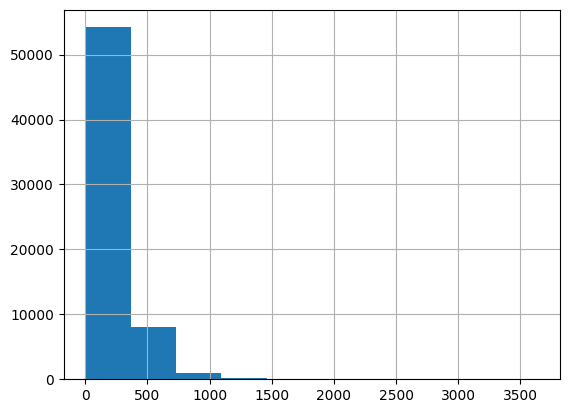

In [13]:
questions.words_cnt.hist()

In [14]:
questions.tech_words_cnt.value_counts()

tech_words_cnt
0      25212
1      10542
2       7311
3       5038
4       3657
5       2752
6       2071
7       1545
8       1171
9        869
10       684
11       504
12       440
13       324
14       230
15       197
16       170
17       122
18        92
19        80
20        61
21        47
22        43
23        39
24        34
27        28
25        25
26        17
29        15
32        11
30         9
28         9
31         8
35         7
33         6
34         6
39         6
36         5
40         5
41         4
48         3
46         3
38         3
37         3
50         2
42         2
43         2
45         2
47         2
53         1
49         1
106        1
44         1
100        1
Name: count, dtype: int64

Добавим флаги по посчитанным метрикам

In [15]:
rating_barrier = -1
len_barrier = 50
tech_words_barrier = 3
questions["is_dummy"] = (questions["Score"] <= rating_barrier) | (questions["words_cnt"] <= len_barrier) | (questions["tech_words_cnt"] <= tech_words_barrier)

/var/folders/bz/m50lp4pd7gz1pfrr0m8krgtm0000gn/T/ipykernel_22491/3366938931.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions["is_dummy"] = (questions["Score"] <= rating_barrier) | (questions["words_cnt"] <= len_barrier) | (questions["tech_words_cnt"] <= tech_words_barrier)


In [16]:
len_barrier = 350
questions["is_complex"] = (questions["Score"] > rating_barrier) & (questions["words_cnt"] >= len_barrier) & (questions["tech_words_cnt"] > tech_words_barrier)  # & (questions["negative_answers"] >= 2)

/var/folders/bz/m50lp4pd7gz1pfrr0m8krgtm0000gn/T/ipykernel_22491/3150892594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions["is_complex"] = (questions["Score"] > rating_barrier) & (questions["words_cnt"] >= len_barrier) & (questions["tech_words_cnt"] > tech_words_barrier)  # & (questions["negative_answers"] >= 2)


In [17]:
questions.is_dummy.value_counts()

is_dummy
True     49094
False    14329
Name: count, dtype: int64

In [18]:
questions.is_complex.value_counts()

is_complex
False    58308
True      5115
Name: count, dtype: int64

Если учесть наличие `negative_answers`, то количество `complex` вопросов падает до 70 =[

In [19]:
questions[questions["is_dummy"] & questions["is_complex"]].shape[0]  # чекаем, что нет пересечения

0

In [21]:
questions.to_csv("../data/cache/prepared_questions_metrics.csv", index=False)

In [22]:
answers.to_csv("../data/cache/prepared_answers_metrics.csv", index=False)